In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV



# To get nicer plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # Output as svg. Else you can try png
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
np.set_printoptions(precision=3);

/tmp/ipython-input-222105500.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg') # Output as svg. Else you can try png


In [ ]:
# Load library

csv_path = '/content/drive/MyDrive/Colab_Notebooks/SML/Project/training_data_VT2026.csv'
training_data = pd.read_csv(csv_path)

training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [ ]:
training_data.head()


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [ ]:
training_data.describe()


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


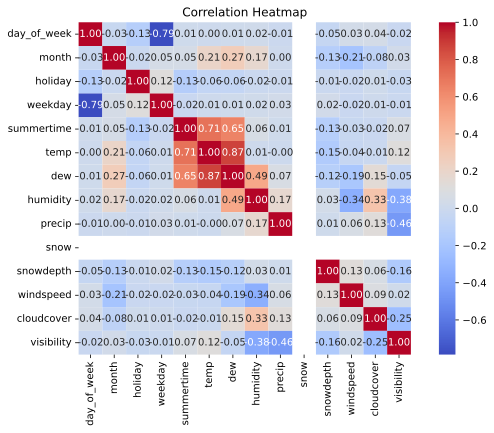

In [ ]:
# Scatterplot of the variables
#pd.plotting.scatter_matrix(training_data.iloc[:, 1:15], figsize=(10,10))
#plt.show()

# Heatmap because scatterplot ruined my life
import seaborn as sns

corr = training_data.iloc[:, 1:15].corr()  # correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()



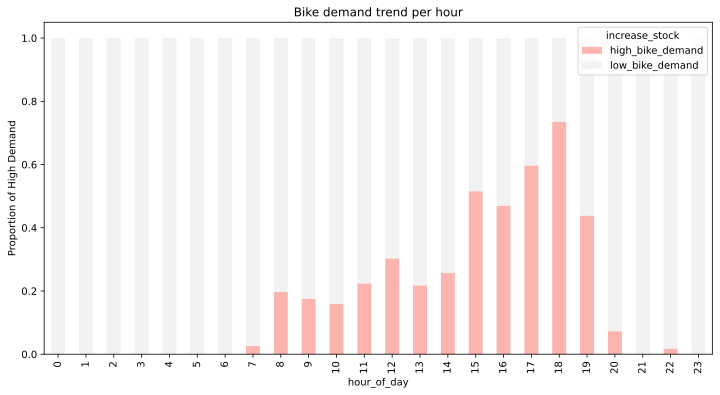

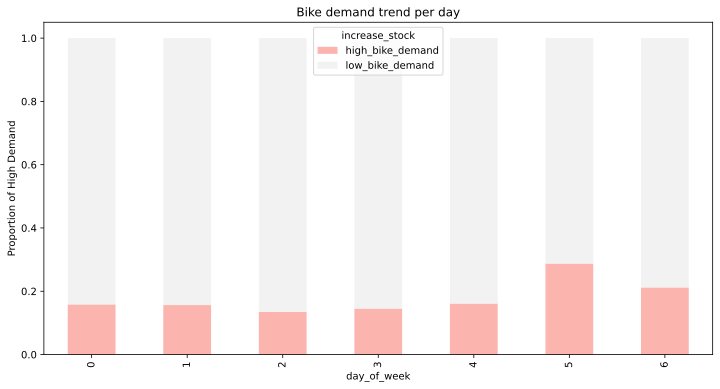

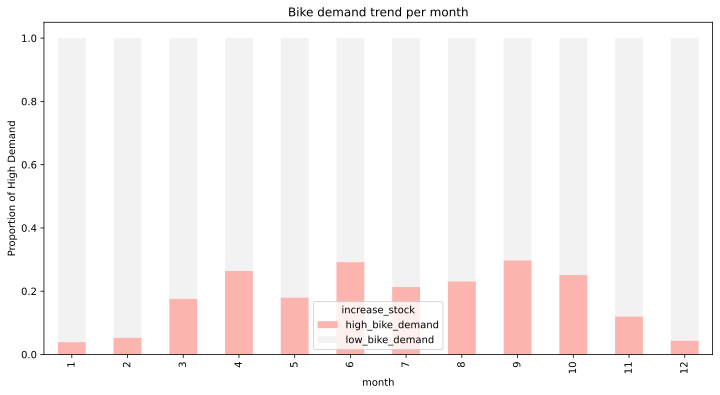

In [ ]:
# Bike demand trend per hour
hour_trend = training_data.groupby('hour_of_day')['increase_stock'].value_counts(normalize=True).unstack()
hour_trend = hour_trend.fillna(0)  # αν υπάρχουν κενά
hour_trend.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.ylabel('Proportion of High Demand')
plt.title('Bike demand trend per hour')
plt.show()

# Day of Week trend
hour_trend = training_data.groupby('day_of_week')['increase_stock'].value_counts(normalize=True).unstack()
hour_trend = hour_trend.fillna(0)  # αν υπάρχουν κενά
hour_trend.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.ylabel('Proportion of High Demand')
plt.title('Bike demand trend per day')
plt.show()

#  Month trend
hour_trend = training_data.groupby('month')['increase_stock'].value_counts(normalize=True).unstack()
hour_trend = hour_trend.fillna(0)  # αν υπάρχουν κενά
hour_trend.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.ylabel('Proportion of High Demand')
plt.title('Bike demand trend per month')
plt.show()


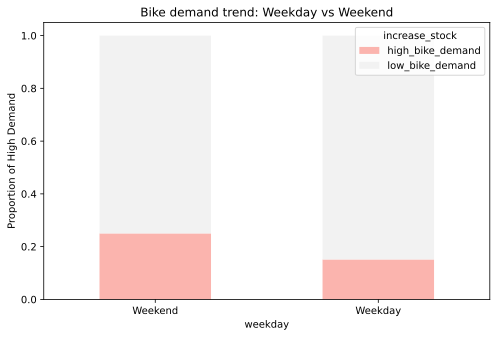

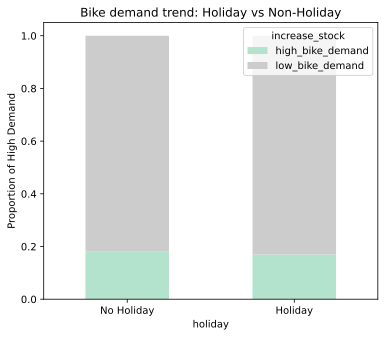

In [ ]:
weekday_trend = training_data.groupby('weekday')['increase_stock'].value_counts(normalize=True).unstack().fillna(0)
holiday_trend = training_data.groupby('holiday')['increase_stock'].value_counts(normalize=True).unstack().fillna(0)

# Plot για weekday
weekday_trend.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
plt.ylabel('Proportion of High Demand')
plt.title('Bike demand trend: Weekday vs Weekend')
plt.xticks([0,1], ['Weekend','Weekday'], rotation=0)
plt.show()

# Plot για holiday
holiday_trend.plot(kind='bar', stacked=True, figsize=(6,5), colormap='Pastel2')
plt.ylabel('Proportion of High Demand')
plt.title('Bike demand trend: Holiday vs Non-Holiday')
plt.xticks([0,1], ['No Holiday','Holiday'], rotation=0)
plt.show()

In [ ]:
#Split data
np.random.seed(1)

trainI = np.random.choice(training_data.shape[0], size=800, replace=False)
trainIndex = training_data.index.isin(trainI)
train = training_data.iloc[trainIndex]  # training set
test = training_data.iloc[~trainIndex]  # test set

# Var classification
X_train = train.drop(columns=['increase_stock'])
Y_train = train['increase_stock']
X_test = test.drop(columns=['increase_stock'])
Y_test = test['increase_stock']

labels = np.unique(Y_test)
print(labels)

numeric_var = ['temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']
categorical_var = ['hour_of_day', 'day_of_week', 'month']
binomial_var = ['holiday', 'weekday', 'summertime', 'snow']

['high_bike_demand' 'low_bike_demand']


In [ ]:
# Model function

def model_function(X_train, Y_train, X_test, Y_test, numeric_vars, categorical_vars, binomial_vars, class_weight=None):

  #Scaling
  scaler = StandardScaler()
  num_var_train_scaled = scaler.fit_transform(X_train[numeric_vars])
  num_var_test_scaled = scaler.transform(X_test[numeric_vars])

  #Dummies
  cat_var_dum_train = pd.get_dummies(X_train[categorical_vars], drop_first=True)
  cat_var_dum_test  = pd.get_dummies(X_test[categorical_vars],  drop_first=True)

  X_train_scaled = np.hstack([num_var_train_scaled, cat_var_dum_train.values, X_train[binomial_vars].values])
  X_test_scaled  = np.hstack([num_var_test_scaled,  cat_var_dum_test.values,  X_test[binomial_vars].values])

  # Log Regr
  model = skl_lm.LogisticRegression(solver='lbfgs', max_iter=1000, class_weight=class_weight)
  model.fit(X_train_scaled, Y_train)

  # Evaluate on training data
  train_predict = model.predict(X_test_scaled)

  # Metrics
  accuracy = accuracy_score(Y_test, train_predict)

  confusion_mat = confusion_matrix(Y_test, train_predict)

  df_confusion_matrix = pd.DataFrame(confusion_mat,
                                    index=['Actual High_demand', 'Actual Low_demand'],
                                    columns=['Predicted High_demand', 'Predicted Low_demand'])


  precision = precision_score(Y_test, train_predict, pos_label='high_bike_demand')

  recall = recall_score(Y_test, train_predict, pos_label='high_bike_demand')

  f1 = f1_score(Y_test, train_predict, pos_label='high_bike_demand')

  # GridSearchCV
  param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
  grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
  grid.fit(X_train_scaled, Y_train)

  return model, accuracy, df_confusion_matrix, precision, recall, f1, grid.best_params_, grid.best_score_

In [ ]:
# Try1 - all var

model1, accuracy1, df_confusion_matrix1, precision1, recall1, f1_1, best_parameters1, best_score_1 = model_function(
    X_train, Y_train, X_test, Y_test,
    numeric_vars=['temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility'],
    categorical_vars=['hour_of_day','day_of_week','month'],
    binomial_vars=['holiday','weekday','summertime','snow'],
    class_weight= None)

print('Accuracy:',accuracy1)
print('\nConfusion Matrix:',df_confusion_matrix1)
print('\nPrecision:',precision1)
print('\nRecall:',recall1)
print('\nF1_score:',f1_1)
print('\nGrid best parameteres',best_parameters1)
print('\nGrid best score',best_score_1)


Accuracy: 0.845

Confusion Matrix:                     Predicted High_demand  Predicted Low_demand
Actual High_demand                     53                    93
Actual Low_demand                      31                   623

Precision: 0.6309523809523809

Recall: 0.363013698630137

F1_score: 0.4608695652173913

Grid best parameteres {'C': 100}

Grid best score 0.713741635285133


In [ ]:
# Try2 - all var , class = balanced

model2, accuracy2, df_confusion_matrix2, precision2, recall2, f1_2, best_parameters2, best_score_2 = model_function(
    X_train, Y_train, X_test, Y_test,
    numeric_vars=['temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility'],
    categorical_vars=['hour_of_day','day_of_week','month'],
    binomial_vars=['holiday','weekday','summertime','snow'],
    class_weight= 'balanced')

print('Accuracy:',accuracy2)
print('\nConfusion Matrix:',df_confusion_matrix2)
print('\nPrecision:',precision2)
print('\nRecall:',recall2)
print('\nF1_score:',f1_2)
print('\nGrid best parameteres',best_parameters2)
print('\nGrid best score',best_score_2)


Accuracy: 0.7875

Confusion Matrix:                     Predicted High_demand  Predicted Low_demand
Actual High_demand                    109                    37
Actual Low_demand                     133                   521

Precision: 0.45041322314049587

Recall: 0.7465753424657534

F1_score: 0.5618556701030928

Grid best parameteres {'C': 10}

Grid best score 0.7132054198913476


In [ ]:
# Try3 - (temp, humidity) , class = balanced

model3, accuracy3, df_confusion_matrix3, precision3, recall3, f1_3, best_parameters3, best_score_3 = model_function(
    X_train, Y_train, X_test, Y_test,
    numeric_vars=['temp', 'humidity'],
    categorical_vars=['hour_of_day','day_of_week','month'],
    binomial_vars=['holiday','weekday','summertime','snow'],
    class_weight= 'balanced')

print('Accuracy:',accuracy3)
print('\nConfusion Matrix:',df_confusion_matrix3)
print('\nPrecision:',precision3)
print('\nRecall:',recall3)
print('\nF1_score:',f1_3)
print('\nGrid best parameteres',best_parameters3)
print('\nGrid best score',best_score_3)


Accuracy: 0.79

Confusion Matrix:                     Predicted High_demand  Predicted Low_demand
Actual High_demand                    111                    35
Actual Low_demand                     133                   521

Precision: 0.45491803278688525

Recall: 0.7602739726027398

F1_score: 0.5692307692307692

Grid best parameteres {'C': 10}

Grid best score 0.7074118206019695


In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [ ]:
# Try4 - (temp, humidity), is Day , class = balanced

X_train_copy['is_day'] = ((X_train_copy['hour_of_day'] >= 8) & (X_train_copy['hour_of_day'] <= 20)).astype(int)
X_test_copy['is_day']  = ((X_test_copy['hour_of_day'] >= 8) & (X_test_copy['hour_of_day'] <= 20)).astype(int)

model4, accuracy4, df_confusion_matrix4, precision4, recall4, f1_4, best_parameters4, best_score_4 = model_function(
    X_train_copy, Y_train, X_test_copy, Y_test,
    numeric_vars=['temp', 'humidity'],
    categorical_vars=['is_day','day_of_week','month'],
    binomial_vars=['holiday','weekday','summertime','snow'],
    class_weight= 'balanced')

print('Accuracy:',accuracy4)
print('\nConfusion Matrix:',df_confusion_matrix4)
print('\nPrecision:',precision4)
print('\nRecall:',recall4)
print('\nF1_score:',f1_4)
print('\nGrid best parameteres',best_parameters4)
print('\nGrid best score',best_score_4)


Accuracy: 0.8125

Confusion Matrix:                     Predicted High_demand  Predicted Low_demand
Actual High_demand                    127                    19
Actual Low_demand                     131                   523

Precision: 0.49224806201550386

Recall: 0.8698630136986302

F1_score: 0.6287128712871287

Grid best parameteres {'C': 0.1}

Grid best score 0.738830442167089


In [ ]:
# Try5 - temp, humidity, is Day, Good weather , class = balanced

X_train_copy['good_weather'] = ((X_train_copy['temp'] > 12) & (X_train_copy['humidity'] < 75)).astype(int)
X_test_copy['good_weather']  = ((X_test_copy['temp'] > 12) & (X_test_copy['humidity'] < 75)).astype(int)

model5, accuracy5, df_confusion_matrix5, precision5, recall5, f1_5, best_parameters5, best_score_5 = model_function(
    X_train_copy, Y_train, X_test_copy, Y_test,
    numeric_vars=['temp', 'humidity','good_weather'],
    categorical_vars=['is_day','day_of_week','month'],
    binomial_vars=['holiday','weekday','summertime','snow'],
    class_weight= 'balanced')

print('Accuracy:',accuracy5)
print('\nConfusion Matrix:',df_confusion_matrix5)
print('\nPrecision:',precision5)
print('\nRecall:',recall5)
print('\nF1_score:',f1_5)
print('\nGrid best parameteres',best_parameters5)
print('\nGrid best score',best_score_5)


Accuracy: 0.82875

Confusion Matrix:                     Predicted High_demand  Predicted Low_demand
Actual High_demand                    126                    20
Actual Low_demand                     117                   537

Precision: 0.5185185185185185

Recall: 0.863013698630137

F1_score: 0.6478149100257069

Grid best parameteres {'C': 0.1}

Grid best score 0.7560305498928696


In [ ]:
# Naive model
Random_choice_model = np.random.choice(['high_bike_demand', 'low_bike_demand'], size = len(Y_test))

accuracy_naive = accuracy_score(Y_test, train_predict)
confusion_mat_naive = confusion_matrix(Y_test, train_predict)

print("Naive: Random")
print("Accuracy:", accuracy_naive)
print("Confusion Matrix:,", confusion_mat_naive)

IndentationError: unexpected indent (ipython-input-177025980.py, line 4)